## Step 1: Dataset Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [5]:
df.shape

(2823, 25)

In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## Step 2: Data Cleaning and Preprocessing

In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
df['ADDRESSLINE2'] = df['ADDRESSLINE2'].fillna("Unknown")
df['POSTALCODE'] = df['POSTALCODE'].fillna("Unknown")
df['TERRITORY'] = df['TERRITORY'].fillna("Unknown")

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [12]:
df['COUNTRY'] = df['COUNTRY'].str.title()
df['STATUS'] = df['STATUS'].str.title()
df['DEALSIZE'] = df['DEALSIZE'].str.title()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

## Step 3: Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [15]:
df['STATUS'].value_counts()

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [16]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

COUNTRY
Usa            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
Uk              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

In [17]:
df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

In [18]:
df[['SALES','QUANTITYORDERED','PRICEEACH']].corr()

,SALES,QUANTITYORDERED,PRICEEACH
SALES,1.000000,0.551426,0.657841
QUANTITYORDERED,0.551426,1.000000,0.005564
PRICEEACH,0.657841,0.005564,1.000000


## Step 4: Data Visualization

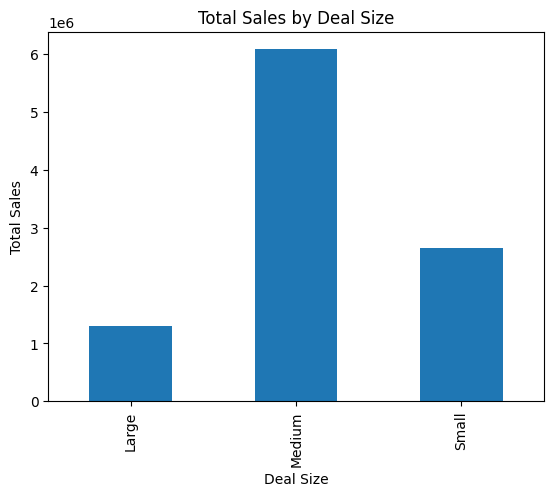

In [19]:
df.groupby('DEALSIZE')['SALES'].sum().plot(kind='bar')
plt.title("Total Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Total Sales")
plt.show()

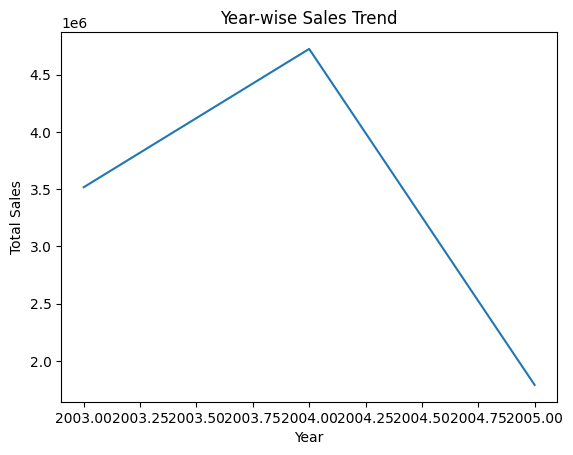

In [20]:
df.groupby('YEAR_ID')['SALES'].sum().plot(kind='line')
plt.title("Year-wise Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

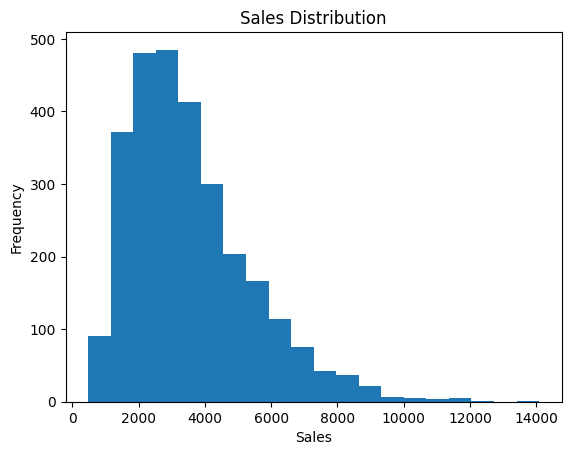

In [21]:
plt.hist(df['SALES'], bins=20)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

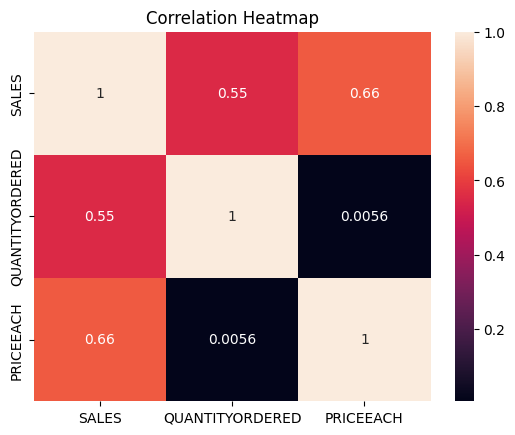

In [22]:
sns.heatmap(
    df[['SALES','QUANTITYORDERED','PRICEEACH']].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()

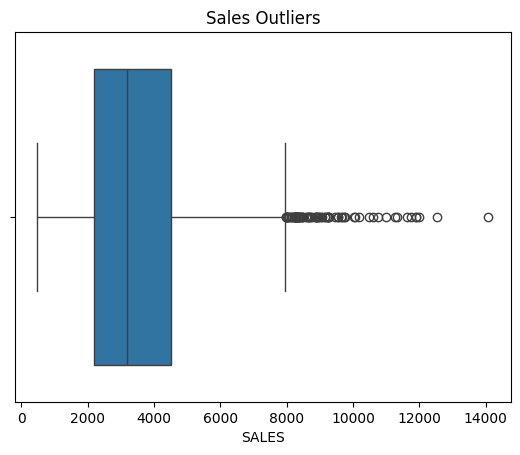

In [23]:
sns.boxplot(x=df['SALES'])
plt.title("Sales Outliers")
plt.show()

## Step 5: Insights and Interpretation

Sales by Deal Size
Large deals generate the highest total sales, followed by medium and small deals, indicating that targeting larger orders significantly boosts revenue.

Year-wise Sales Trend
Sales have been increasing year over year, showing a positive growth trend and suggesting that business strategies are effectively driving revenue.

Product Line Performance
Quantity ordered shows almost no correlation with price per item, meaning customers do not significantly change order volume based on product price.

Sales Distribution & Outliers
Sales values are right-skewed with some extreme high values, indicating that a few large transactions dominate revenue, which could affect forecasting and inventory planning.